# Tutorial #6 - Present and Interact

Welcome to the IBM Data Scientist Workbench. This notebook is the **sixth** in a series of "getting started" tutorials that is designed to introduce some basic concepts and help get you familiar with using the workbench.

In this notebook we introduce you to some workbench features designed to help you present notebooks with interactive widgets as a dashboard. Specifically, this tutorial covers how to:

1. Load data in memory using a `pandas` DataFrame
1. Interactively explore data using a widget
1. Present a widget in a dashboard

## Motivation
Notebooks provide a great way to communicate insights with your peers and decisions makers. However, there's a variety in the audience who consumes your notebooks. Part of the audience wants to see the entire code in the spirit of reproducible research. They are comfortable modifying code to explore data in slightly different ways. Others might only care about analysis results, considering implementation details as irrelevant. These users might be uncomfortable making code changes, but they would still like to interact with the data and its presentation.

This tutorial addresses both requirements and shows how to:
1. Enable users to interact with notebooks without changing code
1. Hide implementation details

Let's get started.

## Pre-requisites
Though not required, it is recommended that you download these tutorial notebooks from the [Welcome](/pages/welcome) page and complete them before proceeding.

### Load Medals Data
As demonstrated in **Tutorial #1 - Get Data**, we can load data by 
following steps:

1. Download the olympic medal data in CSV format.  Click this [Box link](https://ibm.box.com/s/8u9yc1hj7ddvptablj312asm6sfgn5gw) to open the document in a new browser window. 
1. Save the CSV file to your computer by clicking on the Download button.
1. Drag the CSV file from your desktop onto the workbench (Note that the CSV file appears under your **Recent Data** panel in the sidebar.)
1. Click the arrow button (**>**) next to the CSV file you just uploaded.
1. In the section that appears below the item, click "Rename"
1. Change the name of the file to "medals.csv" and press Enter or click outside the name.
1. Execute the code cell by clicking the (**&#9658;**) play button on the notebook toolbar, or by pressing Ctrl-Enter.

In [1]:
import pandas
# Load the medals data.
medals_df = pandas.read_csv('/resources/medals.csv')
# Prune non-data rows
medals_df = medals_df.dropna()

## Interactively Explore Olympic Medals History


In previous tutorials, you loaded the winter olympic medals data set, and explored the data to answer specific questions.  For example, in the **Tutorial #2 - Explore and Visualize** notebook, you calculated and plotted the total medals that the top 15 countries had been awarded throughout the history of the winter olympics.

Apart from the total medals there are many other questions the data can answer, e.g.:
* "What country won the most medals in skating competitions?"
* "What country won the most medals in speed skating competitions?"
* "How many olympic gold medals did China win over time?"

Instead of writing code and plotting results for each of these questions separately you can use [Interactive Widgets](http://nbviewer.ipython.org/github/quantopian/ipython/blob/master/examples/Interactive%20Widgets/Index.ipynb) to dynamically plot results.

In this section, you're going to create an [IPython interactive widget](http://nbviewer.ipython.org/github/quantopian/ipython/blob/master/examples/Interactive%20Widgets/Using%20Interact.ipynb) that displays medal counts by country, filtered by a sport-specific search term: 

1. Define a function that plots medal counts by country.
1. Define a function that filters the medals data by a sport-specific search term, e.g. "skating", "skiing", or "snowboarding".
1. Create a widget that invokes #1 and #2 to produce results interactively.

### Plot Medal Counts by Country

To remind yourself of the `medals_df` DataFrame content, view the column headers and a few rows:

In [2]:
medals_df.head(5)

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold


Your're reusing previously written code to calculate and plot the number of medals won. For details review **Tutorial #2 - Explore and Visualize**, available from the [Welcome](/pages/welcome) page:

In [3]:
# Tell the notebook server to render plots inline
import matplotlib.pyplot as plt
%matplotlib inline

def medals_by_country(df):
    '''
    Computes medal counts by country.
    '''
    # group by country, medal color
    medals_by_country = df.groupby(['NOC','Medal']).size()
    medals_by_country_df = medals_by_country.unstack()
    # replace missing counts with '0'
    medals_by_country_df.fillna(0, inplace=True)
    # sort descending by medal color
    actual_medal_colors = []
    for medal_color in ['Gold','Silver','Bronze']:
        if medal_color in medals_by_country_df.columns:
            actual_medal_colors.append(medal_color)
    if len(medals_by_country_df):
        medals_by_country_df.sort(actual_medal_colors, ascending=False, inplace=True)
    return medals_by_country_df

def plot_medals(df, n=15):
    '''
    Plots the medal counts for the top `n` countries.
    '''
    # set medal count for missing medal colors to 0
    for medal_color in ['Gold','Silver','Bronze']:
       if medal_color not in df.columns:
           df.insert(1, medal_color, 0)
    # draw plot
    plot_colors = ['gold', 'silver', 'saddlebrown']
    ax = df[['Gold','Silver','Bronze']][:n]\
        .plot(kind='bar', figsize=(12,5), color=plot_colors)
    ax.set_xlabel("Country")
    ax.set_ylabel("Number of Medals")
    plt.show()

Run the `plot_medals` function to test it.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


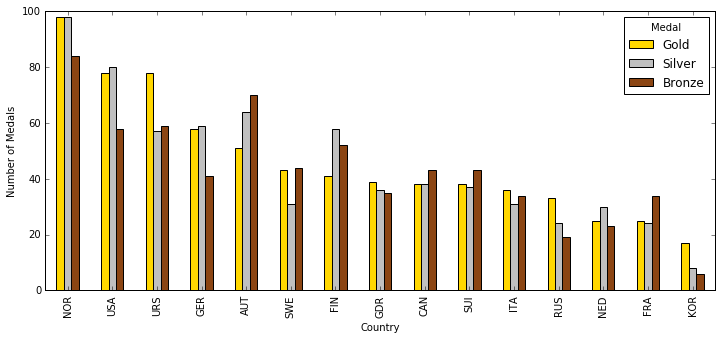

In [4]:
plot_medals(medals_by_country(medals_df))

This plot is similar to the one in **Tutorial #2 - Explore and Visualize**. It looks nice, but isn't interactive.

### Filter Medals Data by a Sport-Specific Search Term

Implement a function to filter the `medals_df` DataFrame:

In [5]:
def filter_medals(search_term):
    '''
    Filters the medals_df DataFrame to only contain rows whose Sport or Discipline
    columns contain the given search_term.
    '''
    return medals_df[medals_df.Sport.str.contains(search_term, case=False) \
                     | medals_df.Discipline.str.contains(search_term, case=False)]

Next, you'll make use of widgets and use the `plot_medals` and `filter_medals` functions to create plots interactively.

### Create a Widget

There are different ways to create widgets:
1. Create default widgets using [Interact](http://nbviewer.ipython.org/github/quantopian/ipython/blob/master/examples/Interactive%20Widgets/Using%20Interact.ipynb)
1. [Configure widgets](http://nbviewer.ipython.org/github/quantopian/ipython/blob/master/examples/Interactive%20Widgets/Widget%20Styling.ipynb)
1. [Build custom widgets](http://nbviewer.ipython.org/github/quantopian/ipython/blob/master/examples/Interactive%20Widgets/Custom%20Widget%20-%20Hello%20World.ipynb)

You'll create a default widget using `interact`. Define a function `search_and_plot_medals` that filters the medal data and plots the result. Make the function interactive by adding the `@interact(search='')` [Python decorator](https://www.python.org/dev/peps/pep-0318/). You can find details about the `@interact` decorator in the [Interactive Widget documentation](http://nbviewer.ipython.org/github/quantopian/ipython/blob/master/examples/Interactive%20Widgets/Using%20Interact.ipynb). Note that simply adding this decorator with the empty string `search` parameter adds a text field called `search` to the output cell and creates an interactive widget that accepts text input.

Run the cell below and try the interactive widget by typing "skating" or other terms into the search text field. The plot and the table below should update instantly:

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


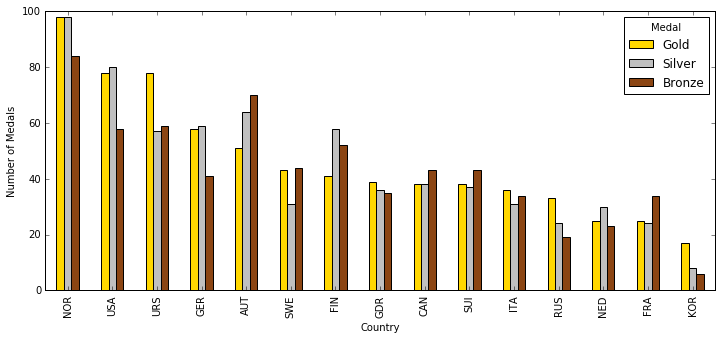

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold
5,1924,Chamonix,Biathlon,Biathlon,FIN,military patrol,M,Silver
6,1924,Chamonix,Skating,Figure skating,FIN,pairs,X,Silver
7,1924,Chamonix,Skating,Speed skating,FIN,10000m,M,Gold
8,1924,Chamonix,Skating,Speed skating,FIN,10000m,M,Silver
9,1924,Chamonix,Skating,Speed skating,FIN,1500m,M,Gold


In [6]:
# import display to show DataFrame content
from IPython.display import display
# import the widgets interact function to automatically create interactive UI
from ipywidgets import interact

# decorate the search_and_plot_medals function using interact
# to create text field UI for search term
@interact(search='')
def search_and_plot_medals(search):
    '''
    Display medals by country when given a search term.
    '''
    filtered_medals = filter_medals(search)
    if len(filtered_medals) == 0:
        print 'No hits'
        return
    
    # show plot 
    plot_medals(medals_by_country(filtered_medals))
    # output results
    display(filtered_medals)

Congratulations! You've created your first interactive widget that uses instant search to dynamically generate plots and result tables.

The `filter_medals` function is used to search only the **Sport** and **Discipline** columns. What if you want to also search on the **NOC** column ([IOC country code](http://en.wikipedia.org/wiki/List_of_IOC_country_codes)) to view medals for a country? What if you made the widget even smarter by enabling search on a subset of columns you can choose dynamically?

You can combine widgets and make them react to multiple types of inputs. For example, the following function allows filtering of the `medals_df` DataFrame by selecting a subset of fields to search. It does so by adding boolean parameters for `sport`, `discipline` and `noc` to the parameter list. The `@interact` decorator automatically converts these parameters into check boxes that are shown in the interactive widget.

In [7]:
def filter_medals_in_columns(df, search_term, cols=None):
    mask = [False] * len(df)
    for col in cols:
        mask |= df[col].str.contains(search_term, case=False)
    return df[mask]

def show_search_and_plot_widget(df):
    @interact(search='')
    def search_and_plot_medals(search, sport=True, discipline=True, noc=True):
        cols = []
        if sport: cols.append('Sport')
        if discipline: cols.append('Discipline')
        if noc: cols.append('NOC')

        filtered = filter_medals_in_columns(df, search, cols)
        if len(filtered) == 0:
            print 'No hits'
            return

        # show plot 
        plot_medals(medals_by_country(filtered))
        # output results
        display(filtered)

Explore the medal data and answer questions by entering queries into the search box, e.g.:
* "What country won the most medals in skating competitions?"
    * Search "skating"
* "What country won the most medals in speed skating competitions?"
    * Search "speed"
* "How many olympic gold medals did China win over time?"
    * Disable the search for "sport" and "discipline" by unchecking the check boxes, make sure "noc" ([IOC country code](http://en.wikipedia.org/wiki/List_of_IOC_country_codes)) remains checked
    * Search "chn"

Continue to explore the data on your own.

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__main__.py:20: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


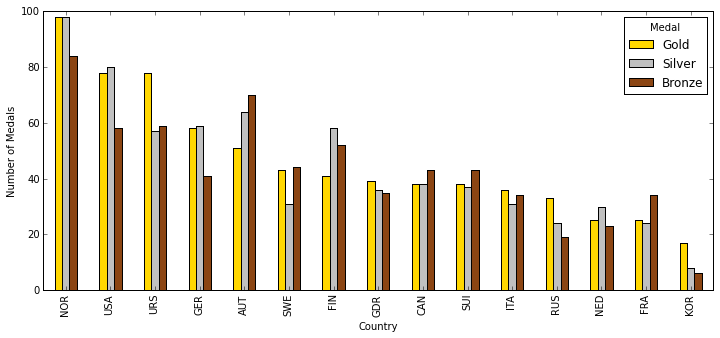

,Year,City,Sport,Discipline,NOC,Event,Event gender,Medal
0,1924,Chamonix,Skating,Figure skating,AUT,individual,M,Silver
1,1924,Chamonix,Skating,Figure skating,AUT,individual,W,Gold
2,1924,Chamonix,Skating,Figure skating,AUT,pairs,X,Gold
3,1924,Chamonix,Bobsleigh,Bobsleigh,BEL,four-man,M,Bronze
4,1924,Chamonix,Ice Hockey,Ice Hockey,CAN,ice hockey,M,Gold
5,1924,Chamonix,Biathlon,Biathlon,FIN,military patrol,M,Silver
6,1924,Chamonix,Skating,Figure skating,FIN,pairs,X,Silver
7,1924,Chamonix,Skating,Speed skating,FIN,10000m,M,Gold
8,1924,Chamonix,Skating,Speed skating,FIN,10000m,M,Silver
9,1924,Chamonix,Skating,Speed skating,FIN,1500m,M,Gold


In [12]:
show_search_and_plot_widget(medals_df)

This interactive widget allows you to plot the number of medals for sport disciplines and countries.

## Present a Widget in a Dashboard

Implementation details about how you compute your insights in a notebook are often not relevant to your audience. The IBM Data Scientist Workbench provides a mechanism to hide these implementation details through its **Dashboard Mode**.

The IBM Data Scientist Workbench allows you to select a subset of cells that are relevant for your presentation, and hide all irrelevant cells by switching into **Dashboard Mode**:

1. To select relevant cells, click the **Cell Toolbar** dropdown menu in the upper right of your notebook and select **Dashboard**. This adds a check box "Show output in dashboard" to every notebook cell.
1. Check the check box "Show output in dashboard" for the cell above ("This interactive ... and countries").
1. From the **View** menu select **Dashboard Mode**. Only selected cells will show.
1. Switch the **View** back to **Notebook Mode** to see the entire notebook.

In **Dashboard** mode you can continue to use interactive widgets, and it allows you to focus on the data that matters most.

## Summary

In this tutorial you created an interactive widget to plot data based on a search query using filters applied by check boxes. You can further explore and customize widgets by following more [Interactive Widgets tutorials](http://nbviewer.ipython.org/github/quantopian/ipython/blob/master/examples/Interactive%20Widgets/Index.ipynb).

## Want to learn more?

<a href="http://bigdatauniversity.com/courses/data-scientist-workbench-tutorial/?utm_source=tutorial6-present&utm_medium=dswb&utm_campaign=bdu"><img src = "https://ibm.box.com/shared/static/ni1of8b042gievv8a1f5iv8aqyruf8sk.png"> </a>

Created by: <a href="https://bigdatauniversity.com/?utm_source=bducreatedbylink&utm_medium=dswb&utm_campaign=bdu">The Big Data University Team</a>